In [28]:
import requests
import pandas as pd 
import numpy as np 
import json 

In [29]:
def get_data(symbols):
    url = "https://yh-finance.p.rapidapi.com/market/v2/get-quotes"
    querystring = {"region":"US","symbols": ",".join(symbols)}
    headers = {
        "X-RapidAPI-Key": "Your_API_Key",
        "X-RapidAPI-Host": "yh-finance.p.rapidapi.com"
    }
    response = requests.request("GET", url, headers=headers, params=querystring)
    json_data = response.json()
    return json_data

In [30]:
def get_symbol_data(data, symbol):
    symbols = data["quoteResponse"]["result"]
    symbol_data = None
    for s in symbols:
        if s["symbol"] == symbol:
            symbol_data = s
            break
    return symbol_data

In [31]:
selected_keys = ['regularMarketPrice', 'regularMarketChangePercent','regularMarketVolume', 'averageDailyVolume3Month', 'fiftyDayAverage','twoHundredDayAverage', 'marketCap']

In [32]:
data = get_data(symbols=["TSLA","GOOG"])
print(data)

{'quoteResponse': {'result': [{'language': 'en-US', 'region': 'US', 'quoteType': 'EQUITY', 'typeDisp': 'Equity', 'quoteSourceName': 'Nasdaq Real Time Price', 'triggerable': True, 'customPriceAlertConfidence': 'HIGH', 'quoteSummary': {'earnings': {'maxAge': 86400, 'earningsChart': {'quarterly': [{'date': '1Q2022', 'actual': 1.07, 'estimate': 0.75}, {'date': '2Q2022', 'actual': 0.76, 'estimate': 0.6}, {'date': '3Q2022', 'actual': 1.05, 'estimate': 0.99}, {'date': '4Q2022', 'actual': 1.19, 'estimate': 1.13}], 'currentQuarterEstimate': 0.86, 'currentQuarterEstimateDate': '1Q', 'currentQuarterEstimateYear': 2023, 'earningsDate': [1681934400]}, 'financialsChart': {'yearly': [{'date': 2019, 'revenue': 24578000000, 'earnings': -862000000}, {'date': 2020, 'revenue': 31536000000, 'earnings': 721000000}, {'date': 2021, 'revenue': 53823000000, 'earnings': 5519000000}, {'date': 2022, 'revenue': 81462000000, 'earnings': 12556000000}], 'quarterly': [{'date': '1Q2022', 'revenue': 18756000000, 'earning

In [33]:
data["quoteResponse"]["result"][0]

{'language': 'en-US',
 'region': 'US',
 'quoteType': 'EQUITY',
 'typeDisp': 'Equity',
 'quoteSourceName': 'Nasdaq Real Time Price',
 'triggerable': True,
 'customPriceAlertConfidence': 'HIGH',
 'quoteSummary': {'earnings': {'maxAge': 86400,
   'earningsChart': {'quarterly': [{'date': '1Q2022',
      'actual': 1.07,
      'estimate': 0.75},
     {'date': '2Q2022', 'actual': 0.76, 'estimate': 0.6},
     {'date': '3Q2022', 'actual': 1.05, 'estimate': 0.99},
     {'date': '4Q2022', 'actual': 1.19, 'estimate': 1.13}],
    'currentQuarterEstimate': 0.86,
    'currentQuarterEstimateDate': '1Q',
    'currentQuarterEstimateYear': 2023,
    'earningsDate': [1681934400]},
   'financialsChart': {'yearly': [{'date': 2019,
      'revenue': 24578000000,
      'earnings': -862000000},
     {'date': 2020, 'revenue': 31536000000, 'earnings': 721000000},
     {'date': 2021, 'revenue': 53823000000, 'earnings': 5519000000},
     {'date': 2022, 'revenue': 81462000000, 'earnings': 12556000000}],
    'quarter

In [34]:
goog_data=get_symbol_data(data=data, symbol="GOOG")

In [35]:
def get_data(symbols: list):
  url = "https://yh-finance.p.rapidapi.com/market/v2/get-quotes"
  querystring = {"region": "US", "symbols": ",".join(symbols)}
  headers = {
    "X-RapidAPI-Key": "Your_API_Key",
    "X-RapidAPI-Host": "yh-finance.p.rapidapi.com"
  }
  response = requests.request("GET", url, headers=headers, params=querystring)
  response_data = response.json()
  json_data = response_data['quoteResponse']['result']
  return {data['symbol']: data for data in json_data}

In [36]:
selected_keys = ['regularMarketPrice', 'regularMarketChangePercent', 'regularMarketVolume', 'averageDailyVolume3Month', 'fiftyDayAverage', 'twoHundredDayAverage', 'marketCap']

In [37]:
def get_selected_data(symbols):
    data = get_data(symbols)
    selected_data = {}
    for symbol, symbol_data in data.items():
        selected_data[symbol] = {key: symbol_data[key] for key in selected_keys}
    return selected_data

In [38]:
symbols = ['TSLA', 'GOOG']
selected_data = get_selected_data(symbols)
print(selected_data)

{'TSLA': {'regularMarketPrice': 185.0, 'regularMarketChangePercent': -0.48412797, 'regularMarketVolume': 96438664, 'averageDailyVolume3Month': 166487579, 'fiftyDayAverage': 192.6202, 'twoHundredDayAverage': 213.75607, 'marketCap': 586322345984}, 'GOOG': {'regularMarketPrice': 109.46, 'regularMarketChangePercent': 1.1738577, 'regularMarketVolume': 20758686, 'averageDailyVolume3Month': 32202246, 'fiftyDayAverage': 99.2922, 'twoHundredDayAverage': 101.63476, 'marketCap': 1397815115776}}


In [39]:
import matplotlib.pyplot as plt

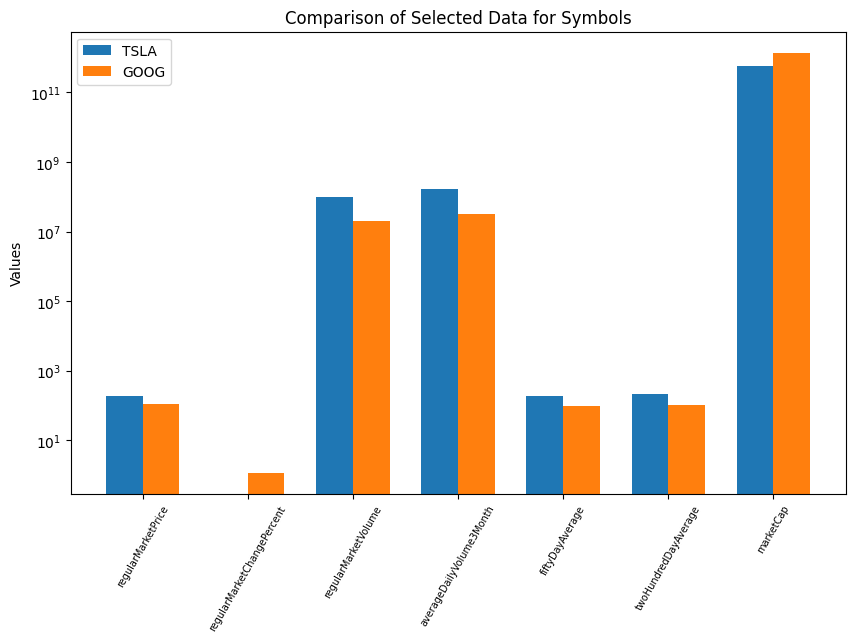

In [40]:
import matplotlib.pyplot as plt
import numpy as np

# Define the variables and their values for each symbol
symbols = ['TSLA', 'GOOG']
selected_keys = ['regularMarketPrice', 'regularMarketChangePercent', 'regularMarketVolume', 'averageDailyVolume3Month', 'fiftyDayAverage', 'twoHundredDayAverage', 'marketCap']
selected_data = get_selected_data(symbols)
symbol_vars = list(selected_data[symbols[0]].keys())
symbol_values = []
for symbol in symbols:
    symbol_values.append(list(selected_data[symbol].values()))

# Define the bar positions
bar_positions = np.arange(len(symbol_vars))

# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(10, 6))

# Create the bar plots for each symbol
width = 0.35
for i in range(len(symbols)):
    ax.bar(bar_positions + width * (i - 0.5), symbol_values[i], width, label=symbols[i])

# Set the axis labels, title, and legend
ax.set_ylabel('Values')
ax.set_title('Comparison of Selected Data for Symbols')
ax.set_xticks(bar_positions)
ax.set_xticklabels(symbol_vars, rotation=60, fontsize=7)
ax.legend()

# Set y-axis scale to logarithmic
ax.set_yscale('log')

# Show the plot
plt.show()


In [41]:
def plot_data(symbols:list, selected_keys:list):
    selected_data = get_selected_data(symbols)
    symbol_vars = list(selected_data[symbols[0]].keys())
    symbol_values = []
    for symbol in symbols:
        symbol_values.append(list(selected_data[symbol].values()))

    # Define the bar positions
    bar_positions = np.arange(len(symbol_vars))

    # Create the figure and axis objects
    fig, ax = plt.subplots(figsize=(10, 6))

    # Create the bar plots for each symbol
    width = 0.35
    for i in range(len(symbols)):
        ax.bar(bar_positions + width * (i - 0.5), symbol_values[i], width, label=symbols[i])

    # Set the axis labels, title, and legend
    ax.set_ylabel('Values')
    ax.set_title('Comparison of Selected Data for Symbols')
    ax.set_xticks(bar_positions)
    ax.set_xticklabels(symbol_vars, rotation=60, fontsize=7)
    ax.legend()

    # Set y-axis scale to logarithmic
    ax.set_yscale('log')

    # Show the plot
    plt.show()

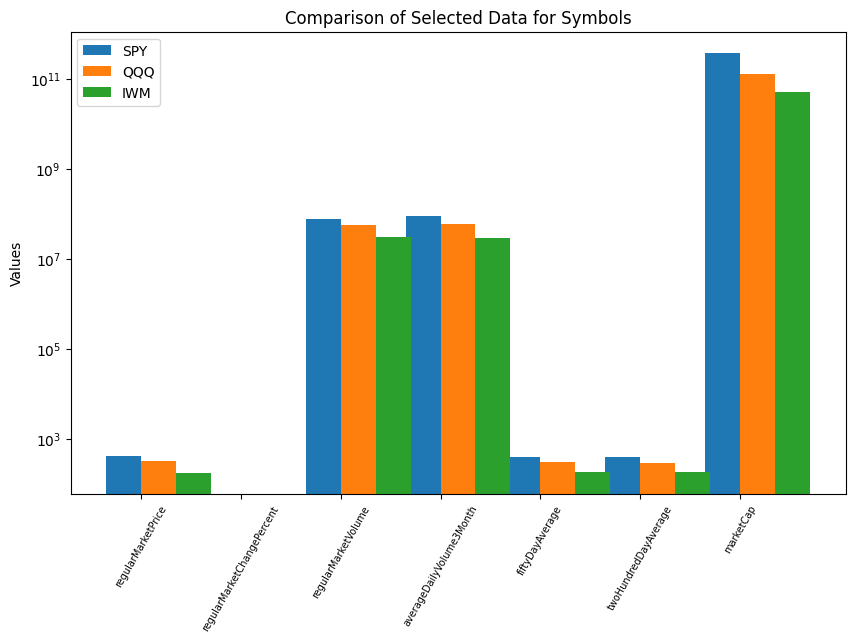

In [42]:
plot_data(["SPY","QQQ", "IWM"], selected_keys=['regularMarketPrice', 'averageDailyVolume3Month', 'fiftyDayAverage', 'marketCap'])

In [45]:
def plot_data(symbols:list, selected_keys:list):
    selected_data = get_selected_data(symbols)
    symbol_vars = list(selected_data[symbols[0]].keys())
    symbol_values = []
    for symbol in symbols:
        symbol_values.append(list(selected_data[symbol].values()))

    # Define the bar positions
    bar_positions = np.arange(len(symbol_vars))

    # Create the figure and axis objects
    fig, ax = plt.subplots(figsize=(10, 6))

    # Create the bar plots for each symbol
    width = 0.2
    for i in range(len(symbols)):
        ax.bar(bar_positions + width * (i - 0.5), symbol_values[i], width, label=symbols[i])

    # Set the axis labels, title, and legend
    ax.set_ylabel('Values')
    ax.set_title('Comparison of Selected Data for Symbols')
    ax.set_xticks(bar_positions)
    ax.set_xticklabels(symbol_vars, rotation=60, fontsize=7)
    ax.legend()

    # Set y-axis scale to logarithmic
    ax.set_yscale('log')

    # Show the plot
    plt.show()

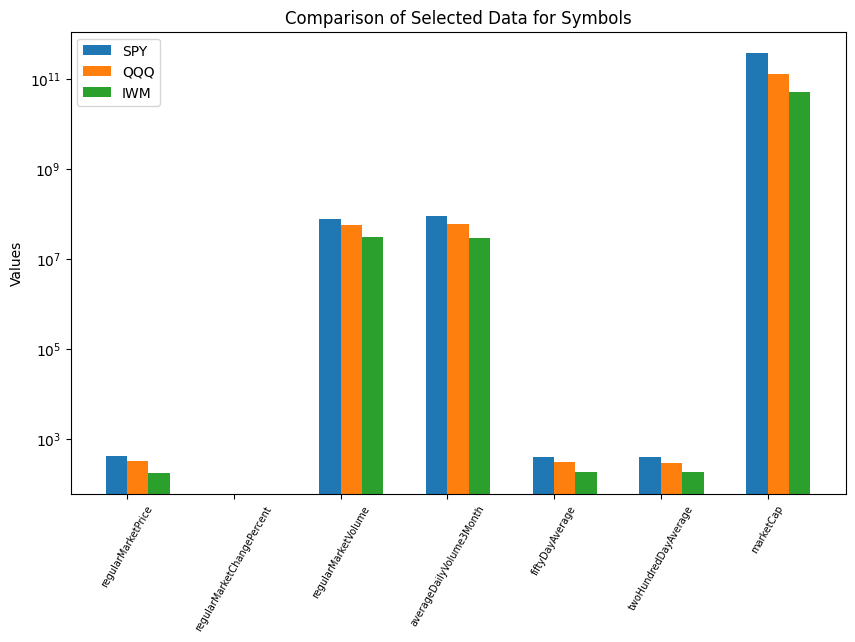

In [46]:
plot_data(["SPY","QQQ", "IWM"], selected_keys=['regularMarketPrice', 'averageDailyVolume3Month', 'fiftyDayAverage', 'marketCap'])